# Analyse exploratoire des données

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_DIR = Path().cwd().parent.resolve()
DATA_DIR = PROJECT_DIR / "data"
DATA_PATH = DATA_DIR / "03_DONNEES.csv"
OUTPUT_DIR = PROJECT_DIR / "output"
FIGURE_DIR = OUTPUT_DIR / "figures"

In [2]:
# Accessibilité : Daltonisme, Dyslexie, Confort Visuel

sns.set_theme(
    style="whitegrid",
    palette="colorblind",
    context="notebook",
)

plt.rcParams.update(
    {
        "figure.dpi": 120,
        "savefig.dpi": 300,
        "font.family": "Arial",
        "font.size": 12,
        "axes.titlesize": 15,
        "axes.titleweight": "bold",
        "axes.labelsize": 13,
        "axes.labelweight": "medium",
        "axes.edgecolor": "black",
        "axes.linewidth": 1.2,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "lines.linewidth": 2.2,
        "lines.markersize": 7,
        "legend.fontsize": 11,
        "legend.frameon": True,
        "legend.framealpha": 0.95,
        "grid.linestyle": ":",
        "grid.linewidth": 0.8,
        "grid.alpha": 0.6,
    }
)

COLORBLIND_PALETTE = sns.color_palette("colorblind")

## Chargement et qualité des données

In [3]:
df = pd.read_csv(DATA_PATH.as_posix())
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,InternetCharges,MonthlyCharges,TotalCharges,Churn
0,customer_1,Male,0,No,Yes,51,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0.00,43.53,2220.03,No
1,customer_2,Male,1,Yes,Yes,14,Yes,Yes,DSL,No internet service,No internet service,Yes,No internet service,Yes,No internet service,Two year,46.00,109.39,1531.46,No
2,customer_3,Female,0,Yes,No,71,No,No,DSL,Yes,No,Yes,Yes,No,Yes,One year,34.36,99.36,7054.56,No
3,customer_4,Male,1,Yes,No,60,Yes,No phone service,Fiber optic,No internet service,No internet service,No,No internet service,Yes,No internet service,Two year,65.56,115.12,6907.20,No
4,customer_5,Male,0,Yes,No,20,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0.00,20.00,400.00,Yes


In [4]:
print(f"Dimensions du DataFrame : {df.shape[0]} lignes et {df.shape[1]} colonnes")

Dimensions du DataFrame : 7043 lignes et 20 colonnes


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  InternetCharges   7043 non-null   float64
 17  Monthl

Observation :
- Pas de valeurs nulles.
- Les types sont cohérents avec les données.

Conclusion :
- Les données sont propores.

## Analyse des features

In [6]:
df.describe()

,SeniorCitizen,tenure,InternetCharges,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.503337,35.902598,46.783412,91.006110,3279.987099
std,0.500024,20.945973,43.812203,54.001753,2976.418208
min,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,18.000000,0.000000,39.310000,940.000000
50%,1.000000,36.000000,40.670000,91.350000,2284.460000
75%,1.000000,54.000000,80.625000,132.930000,5022.900000
max,1.000000,72.000000,139.930000,238.040000,15151.680000


## Analyse de la target `Chrun`

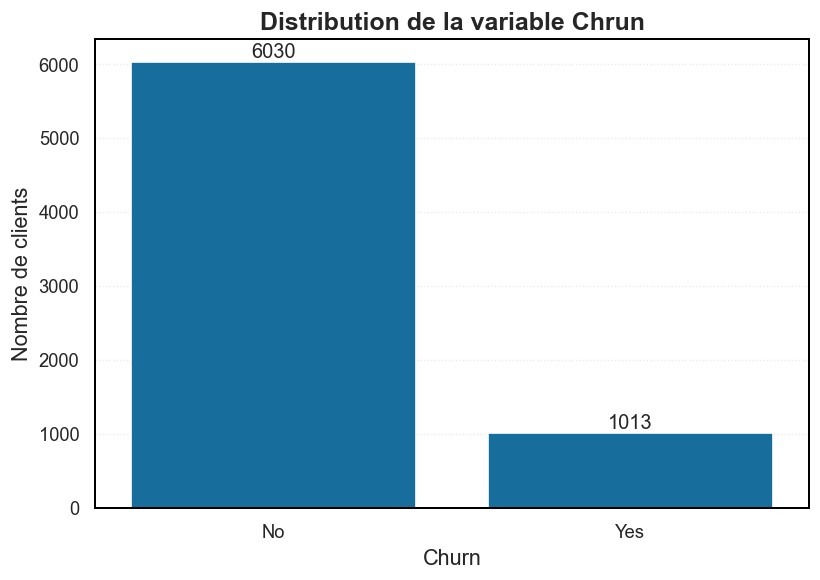

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

churn = df["Churn"].value_counts()

barplot = sns.barplot(
    x=churn.index,
    y=churn.values,
    ax=axes,
)

for container in barplot.containers:
    barplot.bar_label(container)

axes.grid(axis="y", linestyle=":", alpha=0.4)
axes.set_title("Distribution de la variable Chrun")
axes.set_xlabel("Churn")
axes.set_ylabel("Nombre de clients")

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_churn_distribution.png").as_posix())
plt.show()

In [8]:
print(
    f"Proportion de 'No' dans la variable Chrun : {churn.loc['No'] / churn.sum() * 100:.2f}%"
)
print(
    f"Proportion de 'Yes' dans la variable Chrun : {churn.loc['Yes'] / churn.sum() * 100:.2f}%"
)

Proportion de 'No' dans la variable Chrun : 85.62%
Proportion de 'Yes' dans la variable Chrun : 14.38%


Observation :
- La distribution de la variable `Churn` est très déséquilibrée, environ 86% de No et 14% de Yes.

Conclusion :
- Lors du split train/test, la statification est primordiale.
- On portera une attention particulière à la métrique recall pour minimiser le nombre de faux négatifs coûteux pour l'entreprise.
- on préférera un modèle avec pondération des classes.